<a href="https://colab.research.google.com/github/Dheemanth-Chowdary/Prodigy-Internship/blob/main/Prodigy_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (74682, 4)
Sentiment counts:
 Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


<ipython-input-5-d0b862e20ce6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='Set2')


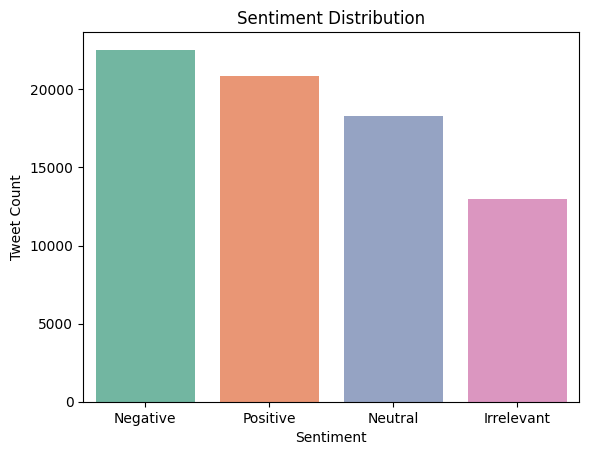

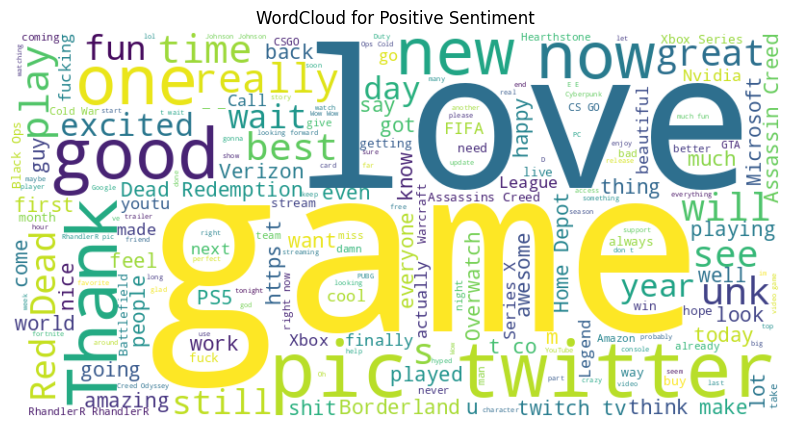

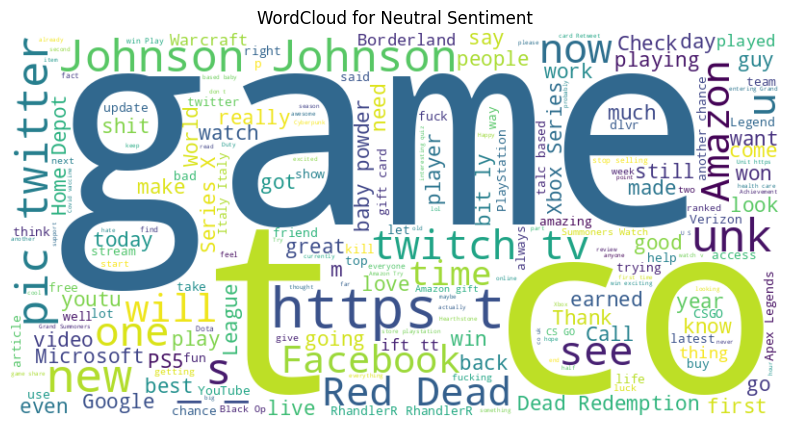

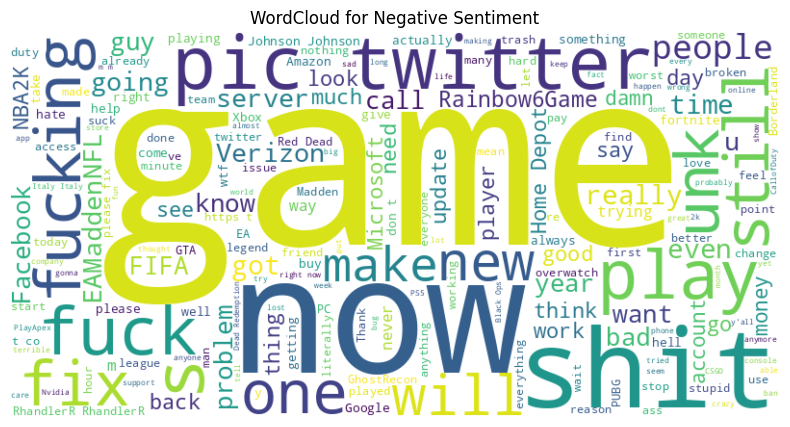

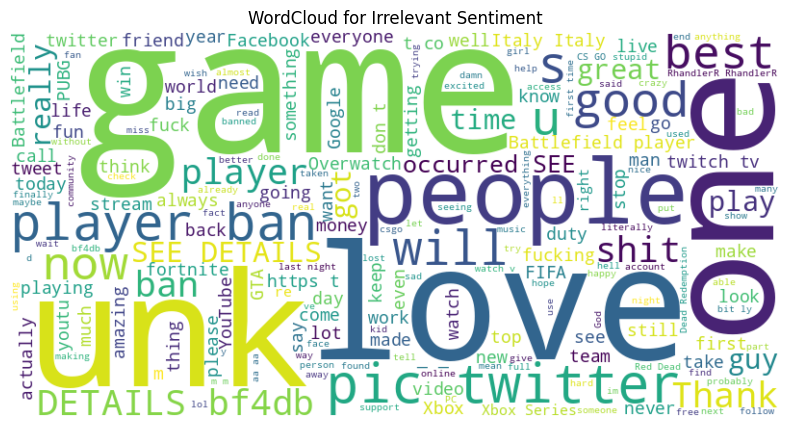

<ipython-input-5-d0b862e20ce6>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Set3")


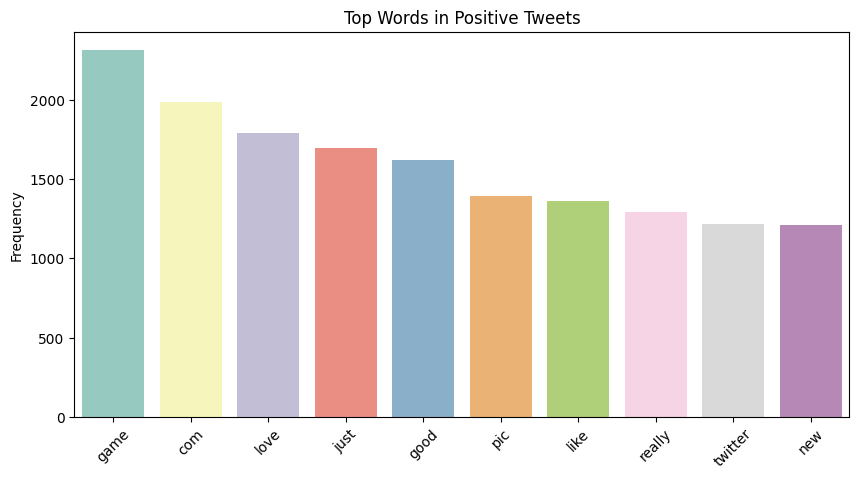

<ipython-input-5-d0b862e20ce6>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Set3")


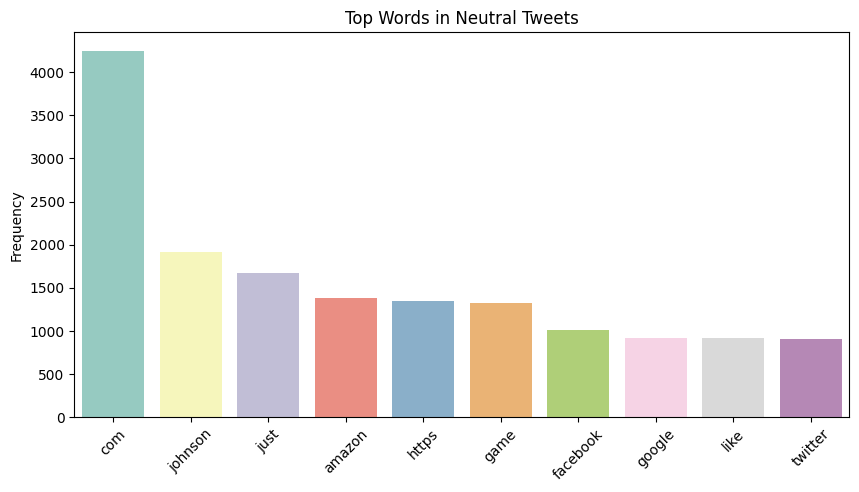

<ipython-input-5-d0b862e20ce6>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Set3")


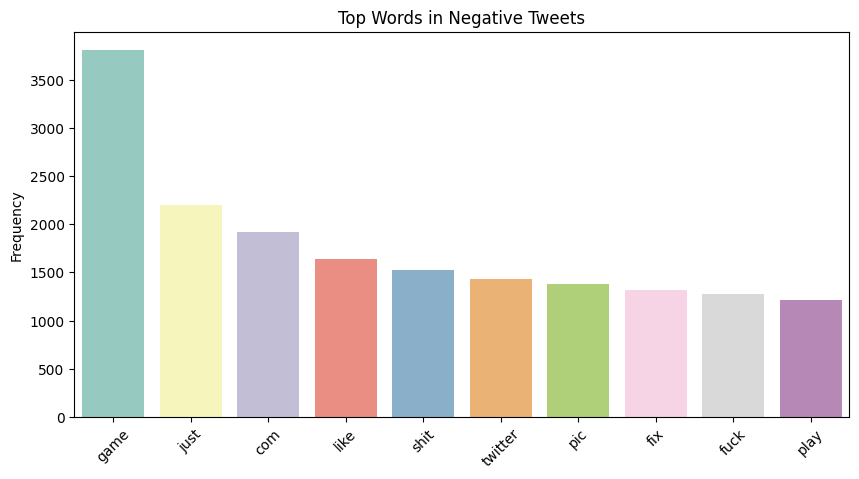

<ipython-input-5-d0b862e20ce6>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="Set3")


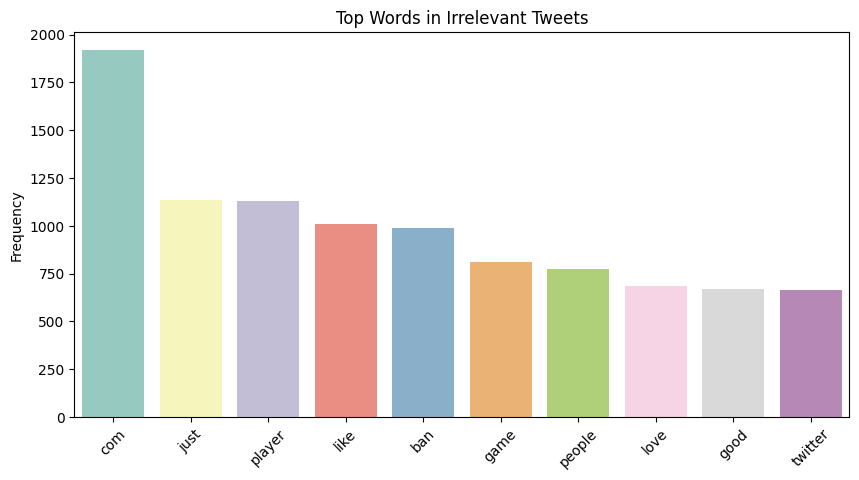

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

df = pd.read_csv("/content/twitter_training.csv", header=None, names=["Tweet_ID", "Entity", "Sentiment", "Tweet"])

print("Dataset shape:", df.shape)
print("Sentiment counts:\n", df["Sentiment"].value_counts())

sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

for sentiment in df['Sentiment'].unique():
    # Ensure tweets are strings and handle potential NaN by dropping them for wordcloud
    text = " ".join(df[df['Sentiment'] == sentiment]['Tweet'].dropna().astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Sentiment")
    plt.show()

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]

for sentiment in df['Sentiment'].unique():
    # Filter for the current sentiment and drop rows with NaN in 'Tweet' column
    sentiment_tweets = df[df['Sentiment'] == sentiment]['Tweet'].dropna()

    # Only proceed if there are tweets remaining after dropping NaNs
    if not sentiment_tweets.empty:
        top_words = get_top_n_words(sentiment_tweets, 10)
        words, counts = zip(*top_words)

        plt.figure(figsize=(10, 5))
        sns.barplot(x=list(words), y=list(counts), palette="Set3")
        plt.title(f"Top Words in {sentiment} Tweets")
        plt.xticks(rotation=45)
        plt.ylabel("Frequency")
        plt.show()
    else:
        print(f"No non-null tweets found for sentiment: {sentiment}. Skipping top words analysis.")